In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction-dataset/cardekho.csv


# Read in data

In [2]:
car = pd.read_csv('/kaggle/input/car-price-prediction-dataset/cardekho.csv')
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


# Data Cleaning

In [3]:
#Duplicates
car_clean = car.copy()
car_clean = car_clean.drop_duplicates()
print(f"Deleted {car.shape[0]-car_clean.shape[0]} duplicated rows")

Deleted 1202 duplicated rows


In [4]:
# Nulls
print(car_clean.isna().sum()/car.shape[0]*100)

# Drop nulls
original_rows = car_clean.shape[0]
car_clean = car_clean.dropna()
new_rows = car_clean.shape[0]
print(f'Deleted {original_rows - new_rows} rows contain null values')

name                  0.000000
year                  0.000000
selling_price         0.000000
km_driven             0.000000
fuel                  0.000000
seller_type           0.000000
transmission          0.000000
owner                 0.000000
mileage(km/ltr/kg)    2.559055
engine                2.559055
max_power             2.522146
seats                 2.559055
dtype: float64
Deleted 208 rows contain null values


In [5]:
car_clean = car_clean.reset_index() 

car_clean.to_csv('cleaned_data.csv', index=True)

## Make Values Numerical

Encoding columns to numerical datatypes because most models handle only numerical datas.

In [6]:
# Look at some rows
df = car_clean.copy()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               6718 non-null   int64  
 1   name                6718 non-null   object 
 2   year                6718 non-null   int64  
 3   selling_price       6718 non-null   int64  
 4   km_driven           6718 non-null   int64  
 5   fuel                6718 non-null   object 
 6   seller_type         6718 non-null   object 
 7   transmission        6718 non-null   object 
 8   owner               6718 non-null   object 
 9   mileage(km/ltr/kg)  6718 non-null   float64
 10  engine              6718 non-null   float64
 11  max_power           6718 non-null   object 
 12  seats               6718 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 682.4+ KB
None


In [7]:
# non numerical datas are:
columns_to_convert = ['fuel','seller_type', 'transmission', 'owner', 'max_power']
df[columns_to_convert].head()

,fuel,seller_type,transmission,owner,max_power
0,Diesel,Individual,Manual,First Owner,74
1,Diesel,Individual,Manual,Second Owner,103.52
2,Petrol,Individual,Manual,Third Owner,78
3,Diesel,Individual,Manual,First Owner,90
4,Petrol,Individual,Manual,First Owner,88.2


In [8]:
# Ignore replce() FutureWarning.
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# fuel:
print(f'original fuel column:\n {df.fuel.unique()}')
df['fuel'] = df['fuel'].replace({
    'Diesel': 1,'Petrol': 2,'LPG': 3,'CNG': 4
})
df['fuel'] = df['fuel'].infer_objects()
print(f'After encoding:\n {df.fuel.unique()}\n')

# transmission:
print(f'original transmission column:\n {df.transmission.unique()}')
df['transmission'] = df['transmission'].replace({
    'Manual': 1, 'Automatic': 2
})
print(f'After encoding: \n {df.transmission.unique()}\n')

# seller_type:
print(f'original seller_type column:\n {df.seller_type.unique()}')
df['seller_type'] = df['seller_type'].replace({
    'Individual': 1, 'Dealer': 2, 'Trustmark Dealer': 3
})
print(f'After encoding:\n {df.seller_type.unique()}\n')

# owner:
print(f'original owner column:\n {df.owner.unique()}')
df['owner'] = df['owner'].replace({
    'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3,
    'Fourth & Above Owner': 4, 'Test Drive Car': 5
})
print(f'After encoding:\n {df.owner.unique()}')

original fuel column:
 ['Diesel' 'Petrol' 'LPG' 'CNG']
After encoding:
 [1 2 3 4]

original transmission column:
 ['Manual' 'Automatic']
After encoding: 
 [1 2]

original seller_type column:
 ['Individual' 'Dealer' 'Trustmark Dealer']
After encoding:
 [1 2 3]

original owner column:
 ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
After encoding:
 [1 2 3 4 5]


In [9]:
# max_power (values in the column appeared to be float but saved as 'object' dtype):
df['max_power'] = pd.to_numeric(df['max_power'], errors = 'coerce') # Changes object to float dtype, and save unconvertible values as NA.

# Drop Nulls (in this case, 1 null value was formed after conversion)
print(f"{df['max_power'].isna().sum()} row that contains null values was deleted in this case\n")
df = df.dropna()
print(df['max_power'].head())

1 row that contains null values was deleted in this case

0     74.00
1    103.52
2     78.00
3     90.00
4     88.20
Name: max_power, dtype: float64


# Correlation

In [10]:
df.columns

Index(['index', 'name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine',
       'max_power', 'seats'],
      dtype='object')

### Selecting features


Excluded columns:
* fuel
* seller_type
* transmission
* owner

**Keep only numerical continuous data as below.**

In [11]:
quantitative_features = ['selling_price','year','km_driven','mileage(km/ltr/kg)','engine','max_power','seats']
features = df[quantitative_features]
features.head()

,selling_price,year,km_driven,mileage(km/ltr/kg),engine,max_power,seats
0,450000,2014,145500,23.40,1248.0,74.00,5.0
1,370000,2014,120000,21.14,1498.0,103.52,5.0
2,158000,2006,140000,17.70,1497.0,78.00,5.0
3,225000,2010,127000,23.00,1396.0,90.00,5.0
4,130000,2007,120000,16.10,1298.0,88.20,5.0


<Axes: >

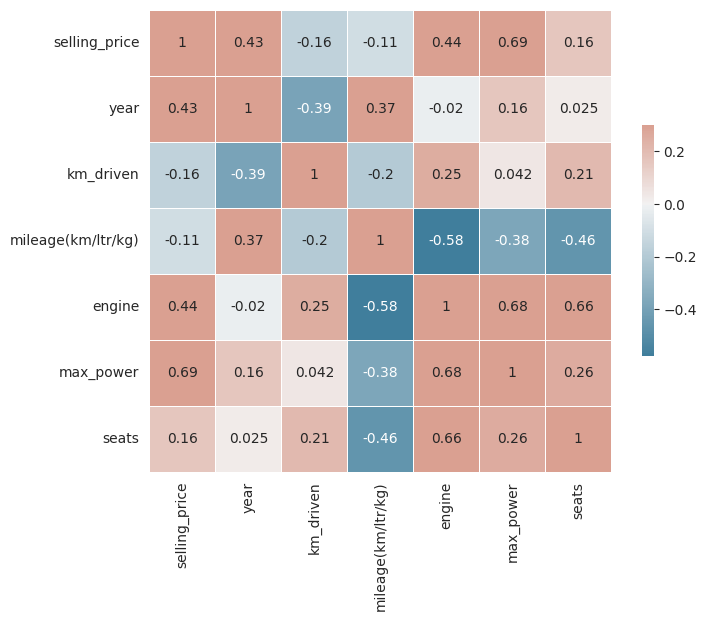

In [12]:
# Calculating correlations
corr_matrix = features.corr()

# Creating a max to show lower haf of the mattrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Setting seaborn style
sns.set_style(style = 'white')

# Graph layout
f, ax= plt.subplots(figsize= (8,6))

# Heat map
cmap = sns.diverging_palette(230, 20, as_cmap=True)  # color style
sns.heatmap(corr_matrix, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True) # Turn on annot to show values on map


# Price Forcasting

## Building Model

* **Define:** What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.
* **Fit:** Capture patterns from provided data. This is the heart of modeling.
* **Predict:** Just what it sounds like
* **Evaluate:** Determine how accurate the model's predictions are.

In [13]:
# Determine X and y (features and target)
# y
y = df['selling_price']
print(y.describe())
print('\n')

# X
car_features = ['year','km_driven','mileage(km/ltr/kg)','engine','max_power','seats']
X = df[car_features]
X.describe()
print(X.describe())

count    6.717000e+03
mean     5.263860e+05
std      5.235504e+05
min      2.999900e+04
25%      2.500000e+05
50%      4.200000e+05
75%      6.500000e+05
max      1.000000e+07
Name: selling_price, dtype: float64


              year     km_driven  mileage(km/ltr/kg)       engine  \
count  6717.000000  6.717000e+03         6717.000000  6717.000000   
mean   2013.611136  7.339834e+04           19.466585  1430.985857   
std       3.897402  5.870328e+04            4.048102   493.469198   
min    1994.000000  1.000000e+00            0.000000   624.000000   
25%    2011.000000  3.800000e+04           16.800000  1197.000000   
50%    2014.000000  6.820300e+04           19.440000  1248.000000   
75%    2017.000000  1.000000e+05           22.500000  1498.000000   
max    2020.000000  2.360457e+06           42.000000  3604.000000   

         max_power        seats  
count  6717.000000  6717.000000  
mean     87.766100     5.434271  
std      31.724555     0.983805  
min      32.800000     2.000

## Decision Tree

In [14]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
carprice_model = DecisionTreeRegressor(random_state=1)

# Fit model
carprice_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [15]:
print("Making predictions for the following 5 cars:")
print(features['selling_price'].head(5))
print('\n')

print("The predictions are")
print(carprice_model.predict(X.head(5)))

Making predictions for the following 5 cars:
0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64


The predictions are
[450000. 370000. 154000. 225000. 130000.]


The results look good but let's calculate the acuracy in the Evaluation section.

### Model Evaluation

#### Mean Absolute Error （MAE）

In [16]:
from sklearn.metrics import mean_absolute_error

predicted_car_prices = carprice_model.predict(X)
mean_absolute_error(y, predicted_car_prices)

7759.6289939528

This is the in-sample score since the train and predict data are from the same Dataset.

### A Better Way to Evaluate Model

Split the dataset into two pieces.

In [17]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# Define model
new_carprice_model = DecisionTreeRegressor()

# Fit model
new_carprice_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = new_carprice_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

107121.96523526077


The Out-of-sample model has an error score of around 106100, much higher than the previous in-sample model..

## Random Forests Model

To avoid **Underfitting** or **Overfitting**: 

Use the following function to determine the optimal number of leaves for smaller MAE

In [18]:
# function to determine optimal # of leaves for smaller MAE
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [19]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  203189
Max leaf nodes: 50  		 Mean Absolute Error:  115577
Max leaf nodes: 500  		 Mean Absolute Error:  98170
Max leaf nodes: 5000  		 Mean Absolute Error:  106099


500 is the optimal number of leaves.

In [20]:
# build forest_model
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
car_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, car_preds))

82233.6311138389


The error become smaller under forest model.